In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

  
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.):  # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob]  # each row is one x value
        return np.array(pdf)
    return ksd

def norm_pdf(x, mu=0, sigma=1):  # normal pdf
    """Returns normal distribution"""
    u = (x - mu) / abs(sigma)
    y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
    y *= np.exp(-u * u / 2)
    return y

def uni_pdf(x, b=1, a=0):
    """Returns uniform distribution"""
    #y = np.linspace(1, 1, Length)
    y = uniform.pdf(x, loc=a, scale=b-a)
    return y


def task_1():
    def normal_task():
        #Plot histogram against normal

        # np.linspace(start, stop, number of steps)
        x_values = np.linspace(-5., 5., 100)

        # Plot normal distribution
        x = np.random.randn(1000)
        plt.figure(1)
        plt.hist(x, bins=30) # number of bins

        # Area of histogram = number of variables (N) times range divided by number of bins. This is the scale factor
        Area_norm = 1000*(max(x)-min(x))/30 # This is a slight approximation but is sufficient

        #plot exact normal distribution
        plt.plot(x_values, Area_norm*norm_pdf(x_values))


        plt.legend()

        plt.title('Normal distribution comparison')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.legend()

        plt.savefig('Normal hist.png')
        plt.show()
        plt.close()

        #Plot normal against kernel density

        plt.figure(2)

        plt.plot(x_values, norm_pdf(x_values), label='normal')
        ks_density = ksdensity(x, width=0.4)
        plt.plot(x_values, ks_density(x_values), label='ksd')

        plt.legend()

        plt.title('Normal distribution comparison')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.legend()
        
        plt.savefig('Normal kernel.png')
        plt.show()
        plt.close()

    def uniform_task():
        # Plot uniform distribution against histogram
        x = np.random.rand(1000)
        plt.figure(1)
        plt.hist(x, bins=20)
        x_values = np.linspace(-4, 4, 1000)

        #plot exact uniform distribution
        Area_uni=1000*1/20  #Area of histogram = number of variables (N) times range divided by number of bins. This is the scale factor

        plt.plot(x_values, Area_uni*uni_pdf(x_values), label='uniform')

        plt.xlim(-0.5,1.5)
        plt.legend()

        plt.title('uniform distribution comparison')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.legend()

        plt.savefig('Uniform hist.png')
        plt.show()
        plt.close()

        #Plot normal against kernel density

        plt.figure(2)

        ks_density = ksdensity(x, width=0.2)

        plt.plot(x_values, norm_pdf(x_values), label='uniform')

        plt.plot(x_values, ks_density(x_values), label='ksd')

        plt.xlim(-4,4)
        plt.legend()

        plt.title('uniform distribution comparison')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.legend()

        plt.savefig('Uniform kernel.png')
        plt.show()
        plt.close()

    def N_task():
        N_list=[100, 1000, 10000]
        n_bins = 20 # number of histogram bins
        fig, ax = plt.subplots(3)

        for N in N_list:
            # Generalising uniform histograms
            mean = N/n_bins # N is number of generated RVs. Mean for numbers only in range of interest.
            sd = np.sqrt(N*(1-1/n_bins)/n_bins)
            x = np.random.rand(N)
            p = ax[N_list.index(N)]
            p.hist(x, bins=n_bins, label = 'N={}'.format(N))

            p.axhline(y=mean, color='r', linestyle='-', linewidth=2)
            p.axhline(y=mean+3*sd, color='b', linestyle='--', linewidth=2)
            p.axhline(y=mean-3*sd, color='b', linestyle='--', linewidth=2)
            p.set_xlim(-0.5,1.5)


            p.set_xlabel('Value')
            p.set_ylabel('Count')
            p.legend()
        fig.suptitle('Histograms for an increasing N number of uniform random variables')
        plt.savefig('Uniform histogram for N=X.png')
        plt.show()
        plt.close()

    normal_task()
    uniform_task()
    N_task()

def task_2():

    x = np.random.randn(1000) # generate gaussian random variable

    def linear_transformation():
        
        a = 3
        b = 6

        x_values = np.linspace(-5, 20, 1000)
        y = a*x+b  #linear transform
        y_pdf = (1/(np.sqrt(2*np.pi*a**2)))*np.exp(-((x_values-b)**2)/(2*a**2))
        

        Area_transformed_norm = (1000*(max(y)-min(y))/30)

        
        plt.hist(y, bins=30, label = 'ax+b transformation')
        plt.plot(x_values, Area_transformed_norm*y_pdf, label='Exact transformed Gaussian')
        plt.title('Transformed Standard Gaussian using y = ax + b')
        plt.legend()
        plt.xlim(-5, 20)
        plt.savefig('linear transformation')
        plt.show()
        plt.close()

    def parabolic_transformation():
        x_values = np.linspace(-1, 10, 1000)
        y = x**2
        y_pdf = (1/(np.sqrt(2*np.pi*x_values)))*np.exp(-x_values/2)

        Area_transformed_norm = (1000*(max(y)-min(y))/30)

        plt.figure()
        plt.hist(y, bins=30, label = 'x^2 transformation')
        plt.plot(x_values, Area_transformed_norm*y_pdf, label='Exact pdf p(y)')
        plt.title('Transformed Standard Gaussian using y = x^2')
        plt.legend()
        plt.xlim(-1, 10)
        plt.ylim(0,600)
        plt.savefig('parabolic transformation')
        plt.show()
        plt.close()


    linear_transformation()
    parabolic_transformation()

def task_3():
    x = np.random.rand(1000) # generate uniform random variables
    x_values = np.linspace(0, 7, 1000)
    exp_pdf = np.exp(-x_values)
    y = -np.log(x) # Inverse CDF of x. x is uniformly distributed between 0 and 1 so can simplify 1-x to x

    Area_transformed_exp = (1000*(max(y)-min(y))/30)

    plt.figure()
    plt.hist(y, bins=30, label = 'Histogram of inverse CDF pdf')

    plt.plot(x_values, Area_transformed_exp*exp_pdf, label='exp pdf')

    ks_density = ksdensity(y, width=0.3)
    plt.plot(x_values, Area_transformed_exp*ks_density(x_values), label='ksd', color='r')

    plt.title('exponential distribution generated from inverse CDF')
    plt.legend()
    plt.xlim(-1,7)
    plt.savefig('Inverse CDF Method')
    plt.show()
    plt.close()

def task_4():
    # a) choose parameters
    alphas = [0.5, 1.5]  # Different alpha values to test
    betas = [-1, -0.5, 0, 0.5, 1]  # Different beta values

    

    # Function to generate X based on the given recipe
    def calc_X(alpha, beta, N):
        # Calculate constants
        b = (1/alpha)*np.arctan(beta*np.tan(np.pi*alpha/2))
        s = (1+beta**2*np.tan(np.pi*alpha/2)**2)**(1/(2*alpha))

        # b) Generate U and c) V
        U = np.random.uniform(-np.pi/2, np.pi/2, N)
        V = np.random.exponential(1, N)
        
        # d) Calculate X
        X = s*(np.sin(alpha*(U+b))/(np.cos(U))**(1/alpha))*((np.cos(U-alpha*(U+b)))/V)**((1-alpha)/alpha)
        
        return X


    N = 10000  # Number of samples
    count = 0
    # Simulate for different alphas and betas
    for alpha in alphas:
        fig, ax = plt.subplots(len(betas), sharex=False)
        count = 0
        for beta in betas:
            p = ax[count]
            X = calc_X(alpha, beta, N)
            outliers = 200
            X_2 = (np.sort(X, axis=1))[outliers/2:-outliers/2]
            p.hist(X_2, bins=500, label=f'Histogram (α={alpha}, β={beta})')
            p.set_xlabel('X')
            p.set_ylabel('Density')
            p.set_xlim(np.min(X_2),np.max(X_2))
            #p.set_ylim(0,100)
            p.legend()
            count += 1
        fig.suptitle('Histograms of a difficult desnity for α={}'.format(alpha))
        plt.savefig('Difficult densities for alpha = {}.png'.format(alpha))
        plt.show()
        plt.close()

def task_5():
    # a) choose parameters
    alphas = [0.5, 1.5]  # Different alpha values to test
    betas = [-1, -0.5, 0, 0.5, 1]  # Different beta values

    # Function to generate X based on the given recipe
    def calc_X(alpha, beta, N):
        b = (1 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
        s = (1 + beta**2 * np.tan(np.pi * alpha / 2)**2)**(1 / (2 * alpha))
        U = np.random.uniform(-np.pi / 2, np.pi / 2, N)
        V = np.random.exponential(1, N)
        X = (
            s
            * (np.sin(alpha * (U + b)) / (np.cos(U))**(1 / alpha))
            * ((np.cos(U - alpha * (U + b))) / V)**((1 - alpha) / alpha)
        )
        return X

    N = 10000  # Number of samples
    bins = 100  # Higher resolution for histograms

    for alpha in alphas:
        fig, axs = plt.subplots(len(betas), figsize=(10, len(betas) * 2), sharex=False)
        for i, beta in enumerate(betas):
            ax = axs[i] if len(betas) > 1 else axs
            X = calc_X(alpha, beta, N)

            # Dynamically determine truncation range based on percentiles
            x_min, x_max = np.percentile(X, [1, 99])

            # Apply truncation only if outliers are few
            X_truncated = np.clip(X, x_min, x_max)
            counts, bin_edges = np.histogram(X_truncated, bins=bins, range=(x_min, x_max), density=True)
            
            # Adjust first and last bins for outliers
            counts[0] += np.sum(X < x_min) / (N * (x_max - x_min) / bins)
            counts[-1] += np.sum(X > x_max) / (N * (x_max - x_min) / bins)
            
            # Plot histogram
            ax.bar(bin_edges[:-1], counts, width=(bin_edges[1] - bin_edges[0]), align='edge', label=f'α={alpha}, β={beta}')
            ax.set_xlabel('X')
            ax.set_ylabel('Density')
            ax.set_xlim(x_min, x_max)
            ax.legend()
            ax.set_xticks(np.linspace(x_min, x_max, 5))  # Add x-axis ticks

        fig.suptitle(f'Difficult Densities for α={alpha}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'Difficult_densities_alpha_{alpha}.png')
        plt.show()

def task_4_peak_focus():
    # a) choose parameters
    alphas = [0.5, 1.5]  # Different alpha values to test
    betas = [-1, -0.5, 0, 0.5, 1]  # Different beta values

    # Function to generate X based on the given recipe
    def calc_X(alpha, beta, N):
        b = (1 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
        s = (1 + beta**2 * np.tan(np.pi * alpha / 2)**2)**(1 / (2 * alpha))
        U = np.random.uniform(-np.pi / 2, np.pi / 2, N)
        V = np.random.exponential(1, N)
        X = (
            s
            * (np.sin(alpha * (U + b)) / (np.cos(U))**(1 / alpha))
            * ((np.cos(U - alpha * (U + b))) / V)**((1 - alpha) / alpha)
        )
        return X

    N = 10000  # Number of samples
    bins = 100  # Higher resolution for histograms

    for alpha in alphas:
        fig, axs = plt.subplots(len(betas), figsize=(10, len(betas) * 4), sharex=False)
        for i, beta in enumerate(betas):
            ax = axs[i] if len(betas) > 1 else axs
            X = calc_X(alpha, beta, N)

            # Main range for histogram
            x_min, x_max = np.percentile(X, [5, 95])  # Focus closer on the peak
            X_main = X[(X >= x_min) & (X <= x_max)]

            # Compute histogram for the main range
            counts, bin_edges = np.histogram(X_main, bins=bins, range=(x_min, x_max), density=True)
            
            # Plot zoomed histogram
            ax.bar(bin_edges[:-1], counts, width=(bin_edges[1] - bin_edges[0]), align='edge', label=f'Zoomed: α={alpha}, β={beta}')
            
            # Annotations for the peak
            peak_bin = np.argmax(counts)
            peak_value = bin_edges[peak_bin]
            ax.annotate(f'Peak: {peak_value:.2f}', xy=(peak_value, counts[peak_bin]), 
                        xytext=(peak_value + (x_max - x_min) * 0.05, counts[peak_bin] * 1.1),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
            
            # Set axis labels and limits
            ax.set_xlim(x_min, x_max)
            ax.set_xlabel('X')
            ax.set_ylabel('Density')
            ax.legend()
            ax.set_title(f'Zoomed Peak Analysis: α={alpha}, β={beta}')

        fig.suptitle(f'Zoomed Densities for α={alpha}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'Zoomed_densities_alpha_{alpha}.png')
        plt.show()







No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


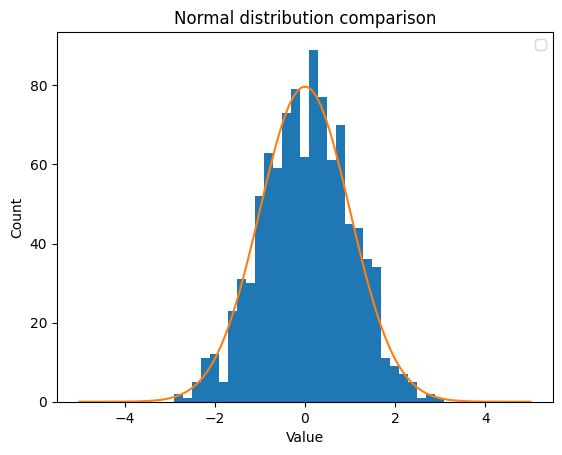

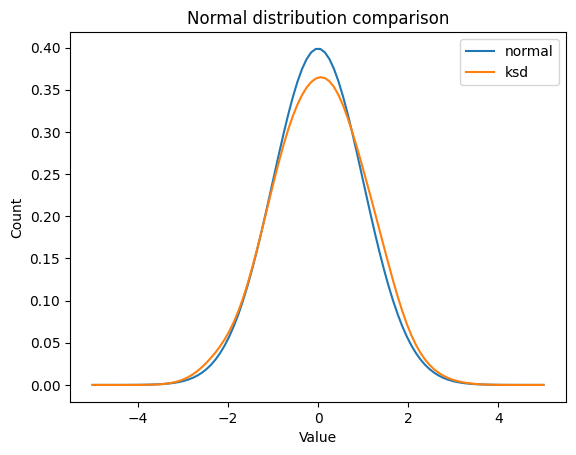

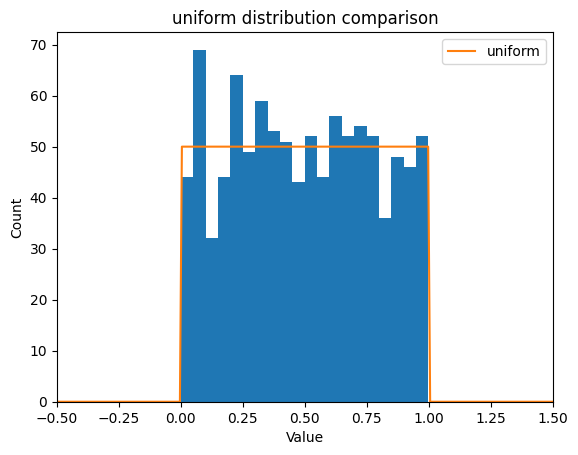

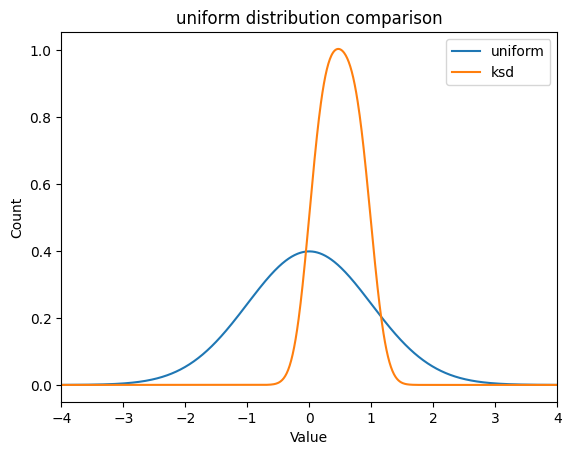

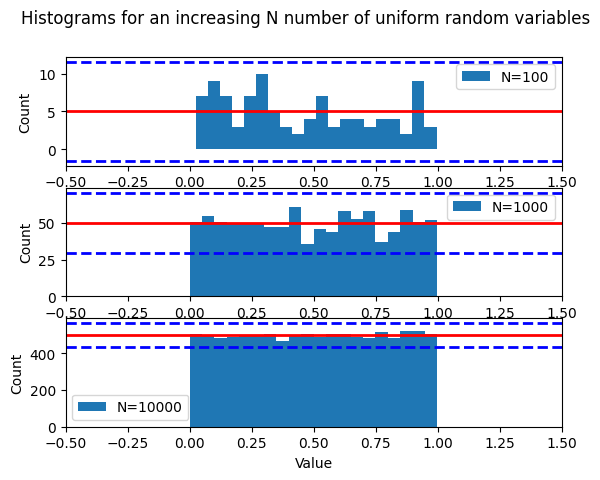

In [3]:
task_1()


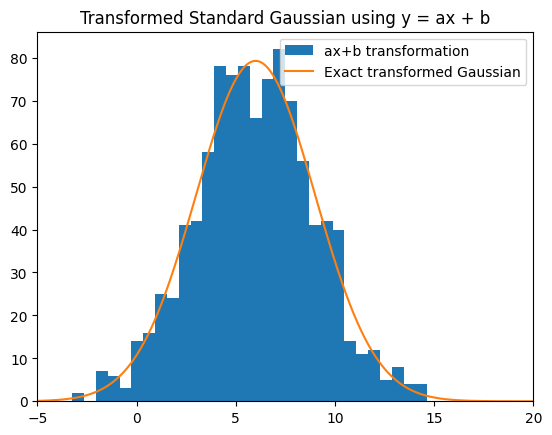

/var/folders/9m/5yl447m538l3dw65wfhnx6xh0000gn/T/ipykernel_47531/3713215500.py:188: RuntimeWarning: invalid value encountered in sqrt
  y_pdf = (1/(np.sqrt(2*np.pi*x_values)))*np.exp(-x_values/2)


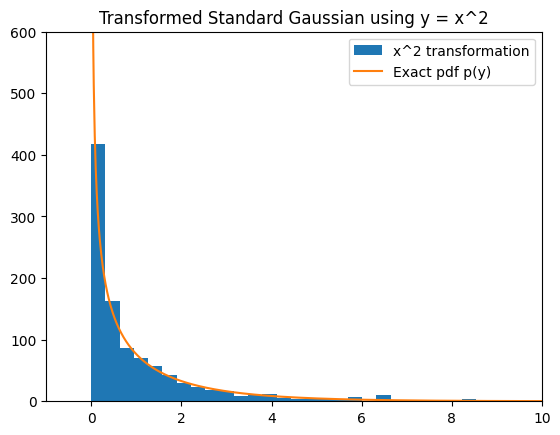

In [4]:
task_2()


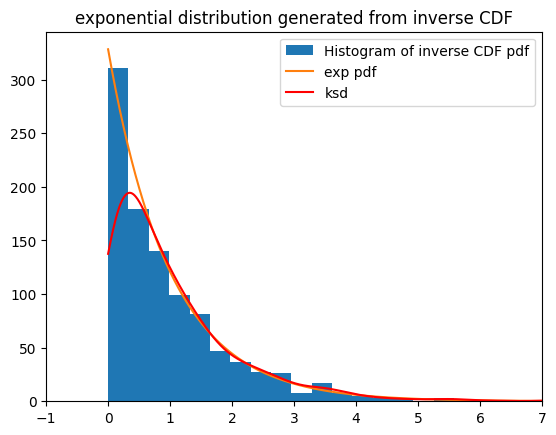

In [5]:
task_3()

AxisError: axis 1 is out of bounds for array of dimension 1

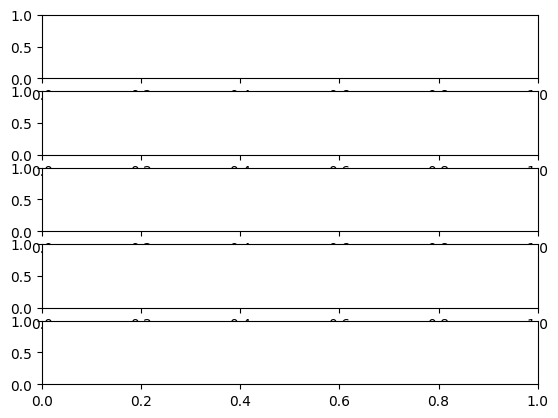

In [6]:
task_4()

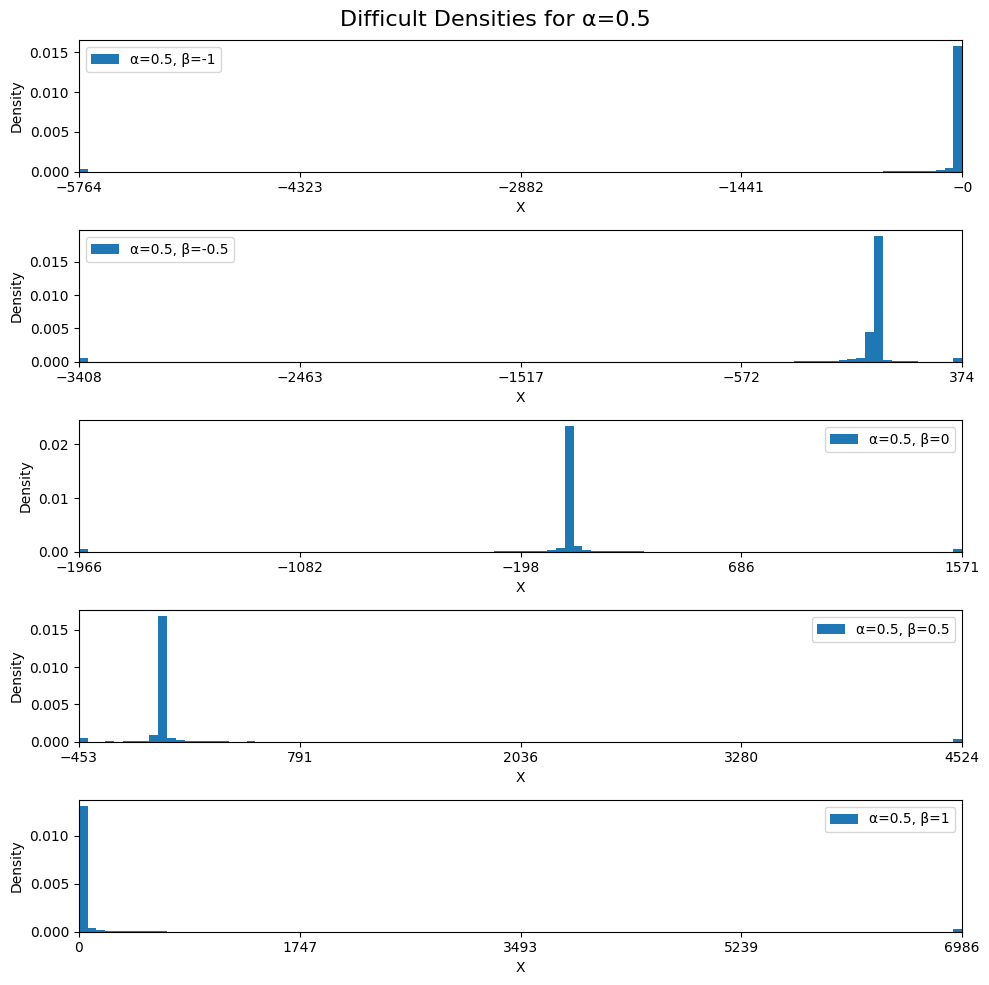

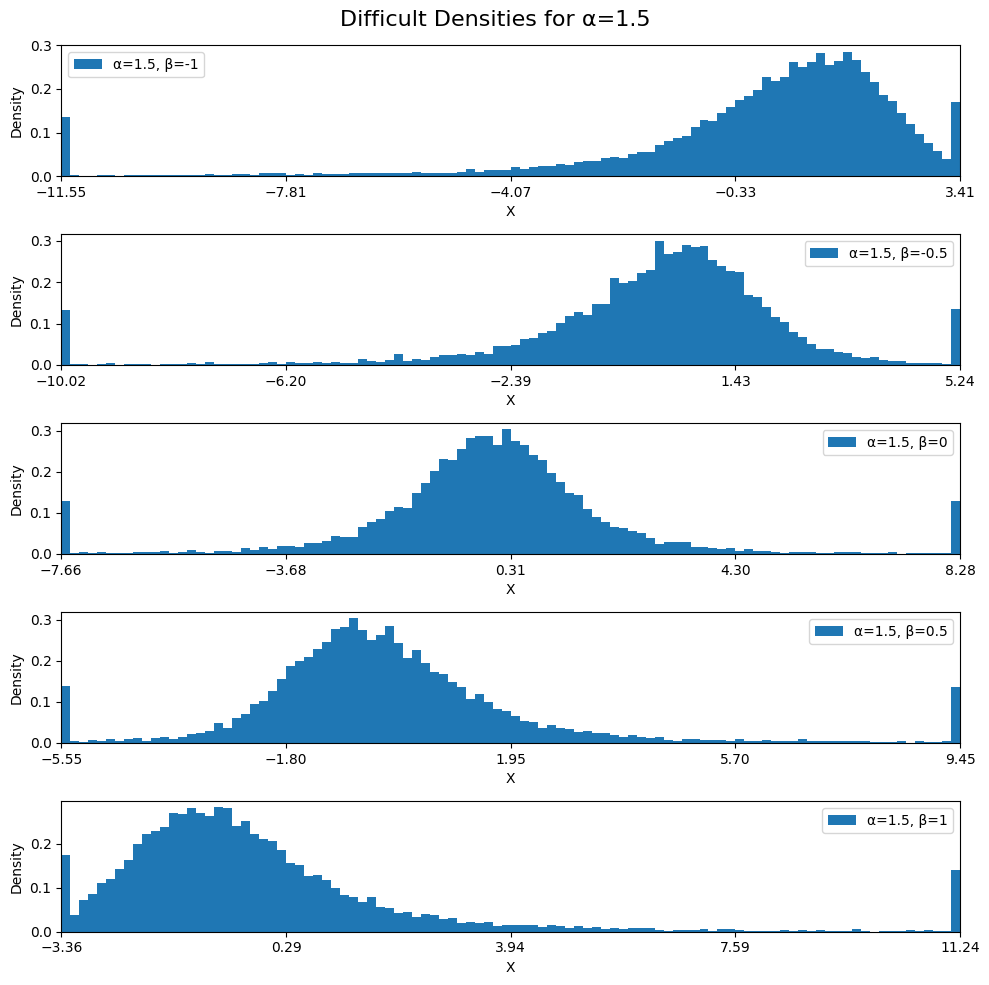

In [7]:
task_5()

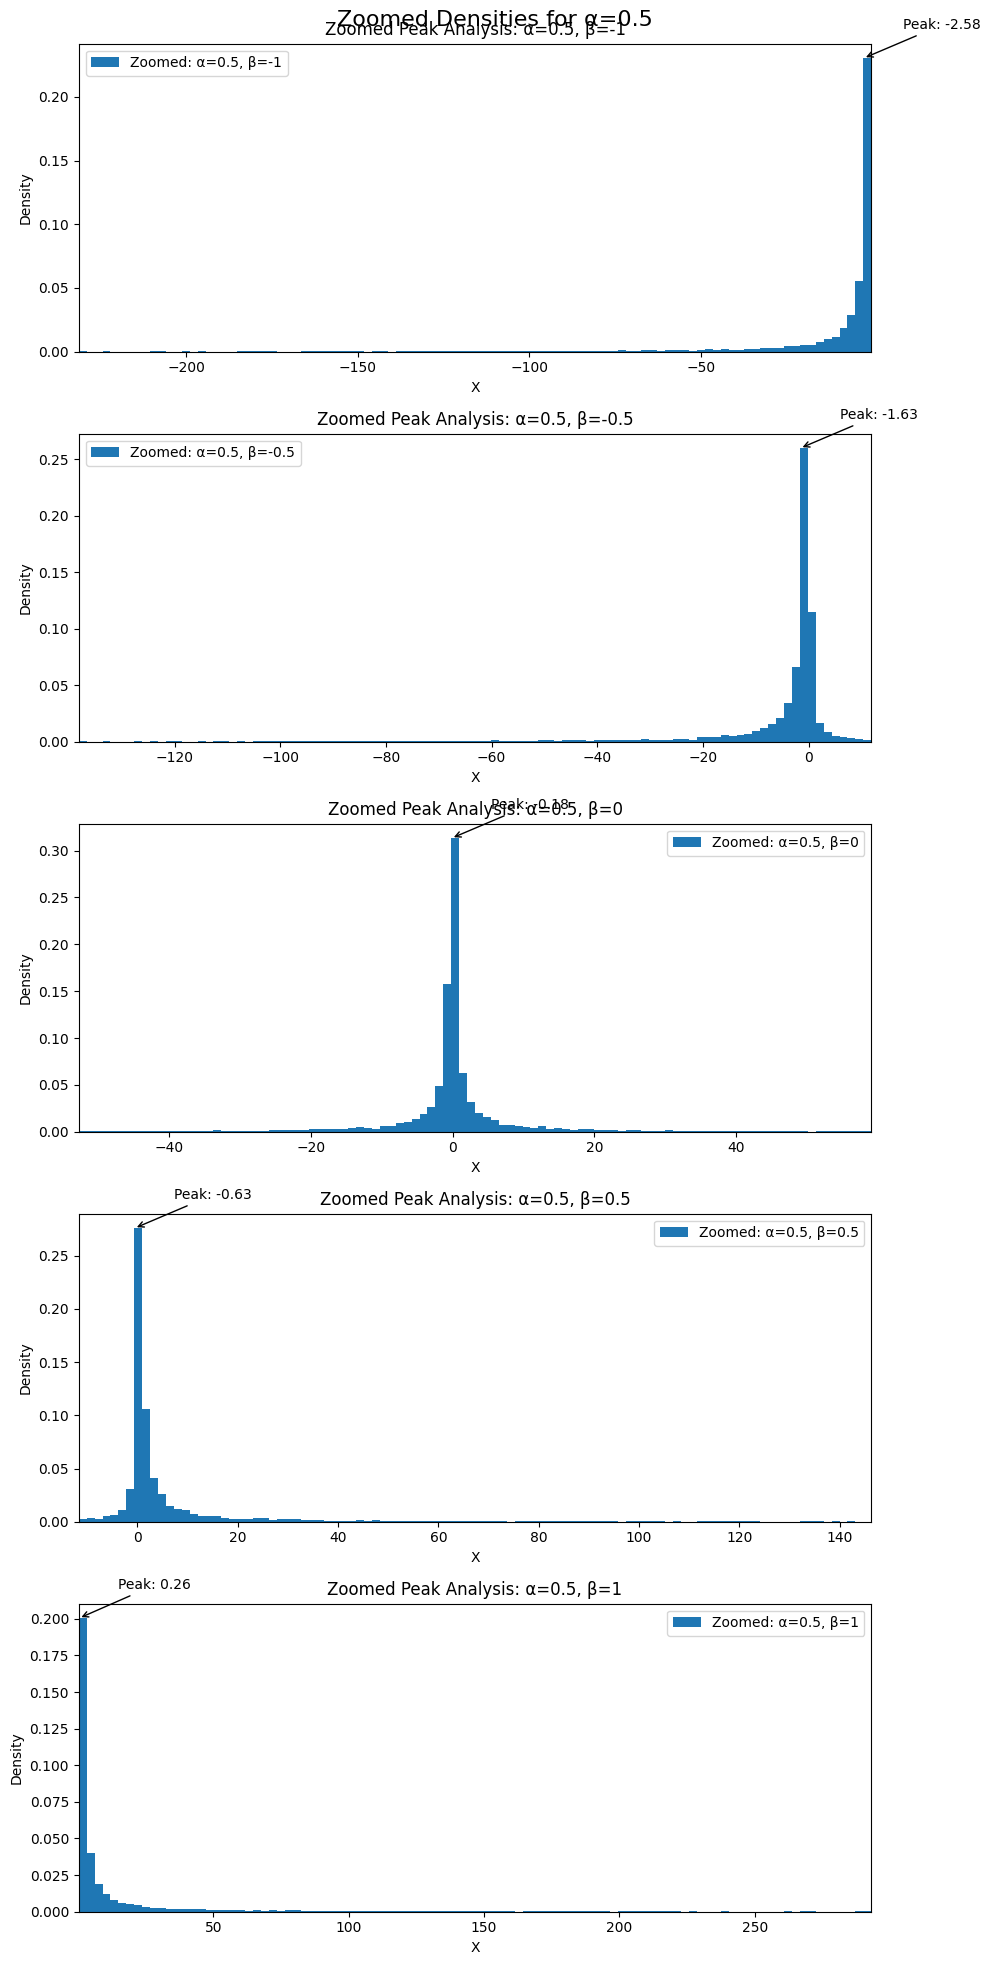

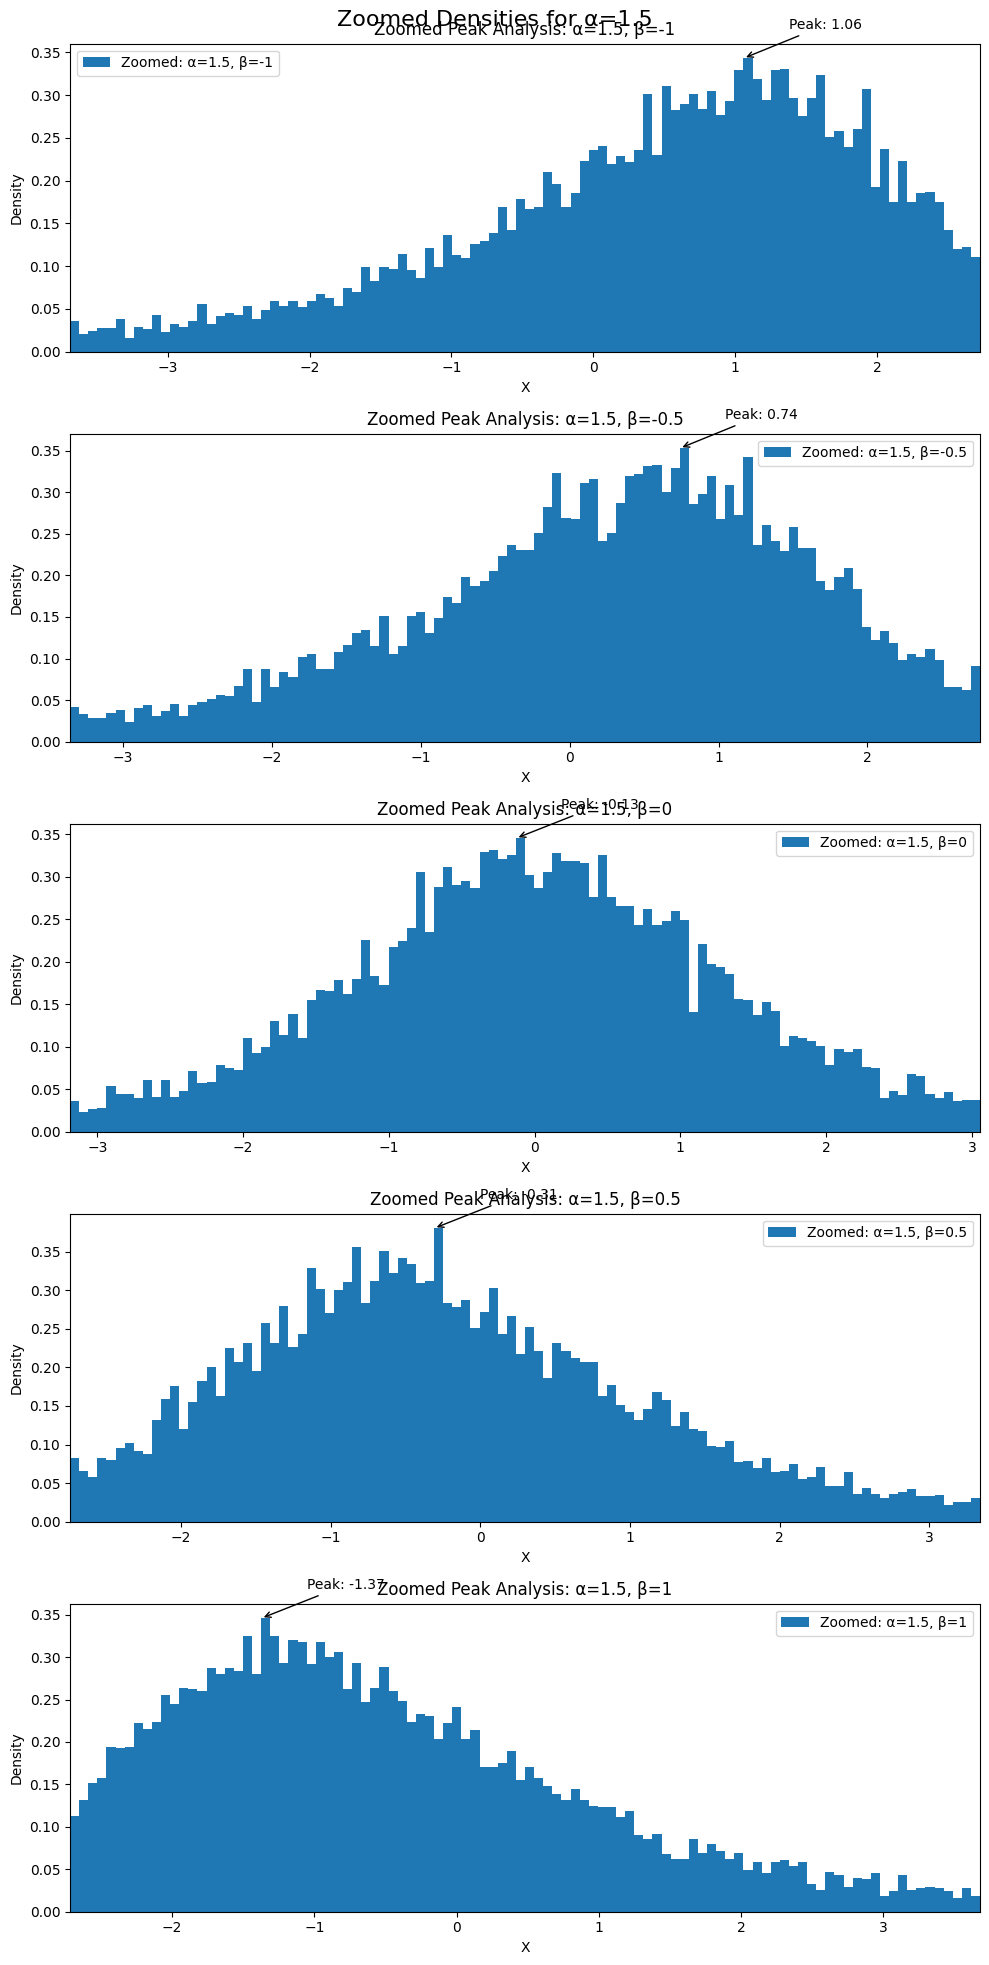

In [8]:
task_4_peak_focus()